<a href="https://colab.research.google.com/github/leandrobrana/Data-Science-I/blob/main/ProyectoDSParteIBra%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis demanda diaria MEM (Mercado eléctrico mayorista)**

En esta primera etapa del proyecto de ciencia de datos, seleccioné un dataset que registra el comportamiento de la demanda de energía eléctrica en el Mercado Eléctrico Mayorista, abarcando el período comprendido entre enero de 2017 y junio de 2025. Los datos los extraje del sitio web oficial de CAMMESA y contienen información estadística sobre la demanda neta diaria, desagregada por región.

El objetivo de este análisis es identificar patrones, relaciones y tendencias significativas entre variables clave, que permitan responder preguntas de interés relacionadas con la evolución de la demanda energética a lo largo del tiempo, así como analizar cómo varía dicha demanda según la estacionalidad climática.

El enfoque del análisis incluye la generación de visualizaciones univariadas, bivariadas y multivariadas, junto con estadísticas descriptivas, con el fin de comprender la estructura de los datos y formular hipótesis bien fundamentadas. Además, se identifican valores perdidos y se evalúa su impacto en la calidad del conjunto de datos.

Este trabajo representa un primer paso en la exploración del dataset y sienta las bases para desarrollos posteriores en análisis predictivo y la construcción de modelos de machine learning.


# **Preguntas e hipótesis de interes**

1. **Preguntas**

* ¿Qué meses tienen mayor demanda eléctrica total?
* ¿Existe una correlación entre la temperatura y la demanda eléctrica en cada región?
* ¿Qué regiones muestran mayor variabilidad de demanda entre días laborables y fines de semana?
* ¿Cómo varía la demanda total estacionalmente?
* ¿Hay alguna tendencia creciente o decreciente de la demanda a lo largo de los años?

2. **Hipótesis**

* La demanda en la región Cuyo es un 35% mayor en verano que en primavera en dias laborales.
*Los fines de semana muestran menor demanda eléctrica que los días laborables en todas las regiones.
*Las regiones con climas más extremos (ej. Patagonia y Comahue) tienen mayor variabilidad diaria en la demanda.





# **Instalaciones**

In [3]:
!pip install unidecode
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.2 MB/s eta 0:00:00


# **Import de librerias**

In [4]:
# Importamos librearias a utilizar
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
# Configuramos el entorno de Python en Google Colab
#from google.colab import drive
#import os

# **Carga de dataset**

In [6]:
# Permite cargar el dataset
from google.colab import files
uploaded = files.upload()

Saving Demanda Diaria MEM.xlsx to Demanda Diaria MEM.xlsx


In [7]:
df = pd.read_excel("Demanda Diaria MEM.xlsx")
df.head()

,AÑO,MES,Fecha,Tipo día,GRAN BS.AS.,BUENOS AIRES,CENTRO,LITORAL,CUYO,NOROESTE,NORESTE,COMAHUE,PATAGONICA,DEMANDA TOTAL,TEMPERATURA REFERENCIA MEDIA °C
0,2017,2017-01-01,2017-01-01,Domingo o Feriado,6352.695208,1472.270500,1134.394250,1766.623958,903.135875,1602.126625,1400.333417,561.243208,500.863042,15693.686083,31.30
1,2017,2017-01-01,2017-01-02,Lunes habiles,6617.863750,1779.435208,1363.527292,1963.925833,1091.811167,1627.567250,1585.616708,638.835167,540.577750,17209.160125,25.35
2,2017,2017-01-01,2017-01-03,Martes Habiles,6677.996167,1888.984333,1600.744625,2036.345917,1178.718583,1806.474000,1652.989833,624.649083,536.472333,18003.374875,25.45
3,2017,2017-01-01,2017-01-04,Miercoles habiles,6426.997625,1840.623833,1356.381292,1756.640500,1078.903250,1759.855667,1604.750375,598.400500,528.904083,16951.457125,27.00
4,2017,2017-01-01,2017-01-05,Jueves Habiles,5873.950750,1770.942583,1366.018917,1848.409375,1037.791833,1403.490042,1228.303125,585.206708,524.657125,15638.770458,21.90


# **Data Wrangling - Limpieza y transformación de datos**

## Normalizaciones y transformaciones

In [8]:
# Quitamos caracteres especiales y unificamos encabezados
df.columns = [unidecode(col)                # Quita acentos
              .strip()                      # Quita espacios alrededor
              .replace(' ', '_')            # Reemplaza espacios internos por _
              .replace('°C', 'C')           # Reemplaza grados si aparecen
              .upper()                      # Mayúsculas
              for col in df.columns]
df.head()

,ANO,MES,FECHA,TIPO_DIA,GRAN_BS.AS.,BUENOS_AIRES,CENTRO,LITORAL,CUYO,NOROESTE,NORESTE,COMAHUE,PATAGONICA,DEMANDA_TOTAL,TEMPERATURA_REFERENCIA_MEDIA_DEGC
0,2017,2017-01-01,2017-01-01,Domingo o Feriado,6352.695208,1472.270500,1134.394250,1766.623958,903.135875,1602.126625,1400.333417,561.243208,500.863042,15693.686083,31.30
1,2017,2017-01-01,2017-01-02,Lunes habiles,6617.863750,1779.435208,1363.527292,1963.925833,1091.811167,1627.567250,1585.616708,638.835167,540.577750,17209.160125,25.35
2,2017,2017-01-01,2017-01-03,Martes Habiles,6677.996167,1888.984333,1600.744625,2036.345917,1178.718583,1806.474000,1652.989833,624.649083,536.472333,18003.374875,25.45
3,2017,2017-01-01,2017-01-04,Miercoles habiles,6426.997625,1840.623833,1356.381292,1756.640500,1078.903250,1759.855667,1604.750375,598.400500,528.904083,16951.457125,27.00
4,2017,2017-01-01,2017-01-05,Jueves Habiles,5873.950750,1770.942583,1366.018917,1848.409375,1037.791833,1403.490042,1228.303125,585.206708,524.657125,15638.770458,21.90


In [9]:
# Generamos una columna nueva: ESTACION
df['ESTACION'] = df['FECHA'].dt.month % 12 // 3 + 1
estaciones = {1: 'Verano', 2: 'Otoño', 3: 'Invierno', 4: 'Primavera'}
df['ESTACION'] = df['ESTACION'].map(estaciones)
df.head()

,ANO,MES,FECHA,TIPO_DIA,GRAN_BS.AS.,BUENOS_AIRES,CENTRO,LITORAL,CUYO,NOROESTE,NORESTE,COMAHUE,PATAGONICA,DEMANDA_TOTAL,TEMPERATURA_REFERENCIA_MEDIA_DEGC,ESTACION
0,2017,2017-01-01,2017-01-01,Domingo o Feriado,6352.695208,1472.270500,1134.394250,1766.623958,903.135875,1602.126625,1400.333417,561.243208,500.863042,15693.686083,31.30,Verano
1,2017,2017-01-01,2017-01-02,Lunes habiles,6617.863750,1779.435208,1363.527292,1963.925833,1091.811167,1627.567250,1585.616708,638.835167,540.577750,17209.160125,25.35,Verano
2,2017,2017-01-01,2017-01-03,Martes Habiles,6677.996167,1888.984333,1600.744625,2036.345917,1178.718583,1806.474000,1652.989833,624.649083,536.472333,18003.374875,25.45,Verano
3,2017,2017-01-01,2017-01-04,Miercoles habiles,6426.997625,1840.623833,1356.381292,1756.640500,1078.903250,1759.855667,1604.750375,598.400500,528.904083,16951.457125,27.00,Verano
4,2017,2017-01-01,2017-01-05,Jueves Habiles,5873.950750,1770.942583,1366.018917,1848.409375,1037.791833,1403.490042,1228.303125,585.206708,524.657125,15638.770458,21.90,Verano


In [81]:
# Convertimos la columna Object a String
df["TIPO_DIA"] = df["TIPO_DIA"].astype("string")
df["ESTACION"] = df["ESTACION"].astype("string")
df["TIPO_DIA_SIMPLE"] = df["TIPO_DIA_SIMPLE"].astype("string")

In [ ]:
# Defino columna regiones, la cual voy a utilizarla en análisis posteriores
columnas_regiones = ['GRAN_BS.AS.', 'BUENOS_AIRES', 'CENTRO', 'LITORAL','CUYO', 'NORESTE', 'NOROESTE', 'COMAHUE', 'PATAGONICA']

## Información del dataset

In [78]:
# Informe sobre la dimension del dataset
df.shape

(3103, 17)

In [82]:
# Informe sobre los tipos de datos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ANO                                3103 non-null   int64         
 1   MES                                3103 non-null   int32         
 2   FECHA                              3103 non-null   datetime64[ns]
 3   TIPO_DIA                           3103 non-null   string        
 4   GRAN_BS.AS.                        3103 non-null   float64       
 5   BUENOS_AIRES                       3103 non-null   float64       
 6   CENTRO                             3103 non-null   float64       
 7   LITORAL                            3103 non-null   float64       
 8   CUYO                               3103 non-null   float64       
 9   NOROESTE                           3103 non-null   float64       
 10  NORESTE                            3

In [83]:
# Descripción del dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ANO,3103.0,2020.763455,2017.0,2019.0,2021.0,2023.0,2025.0,2.461331
MES,3103.0,6.347083,1.0,3.0,6.0,9.0,12.0,3.445776
FECHA,3103,2021-04-01 00:00:00,2017-01-01 00:00:00,2019-02-15 12:00:00,2021-04-01 00:00:00,2023-05-16 12:00:00,2025-06-30 00:00:00,NaN
GRAN_BS.AS.,3103.0,5781.414301,3764.6245,5046.362125,5567.042958,6457.433167,9366.818083,1023.156379
BUENOS_AIRES,3103.0,1815.684927,922.620333,1678.057667,1810.485458,1945.008896,2507.396625,210.590563
CENTRO,3103.0,1352.470516,818.021667,1215.584167,1329.964625,1475.532042,2277.465875,212.801588
LITORAL,3103.0,1867.312008,1196.94625,1669.545437,1815.830542,2039.813,3166.513458,318.976045
CUYO,3103.0,941.466382,654.901792,847.658417,912.611542,1007.200125,1510.408083,137.483156
NOROESTE,3103.0,1279.982303,664.081917,1107.184667,1219.759125,1409.102521,2231.400625,237.262556
NORESTE,3103.0,1140.486845,596.46175,916.636083,1044.441125,1331.222688,2100.469,284.823429


## Análisis de valores nulos

In [84]:
# Cantidad de datos null
df.isnull().sum()

,0
ANO,0
MES,0
FECHA,0
TIPO_DIA,0
GRAN_BS.AS.,0
BUENOS_AIRES,0
CENTRO,0
LITORAL,0
CUYO,0
NOROESTE,0


### Vizualización de nulos con la libreria missingno

Missingno es una biblioteca especialmente diseñada para la visualización y el análisis de valores faltantes en un conjunto de datos.

Aunque en el dataset seleccionado no se identificaron valores nulos, decidi incluir su uso dentro de la estructura del proyecto como una buena práctica en el análisis exploratorio de datos.

<Axes: >

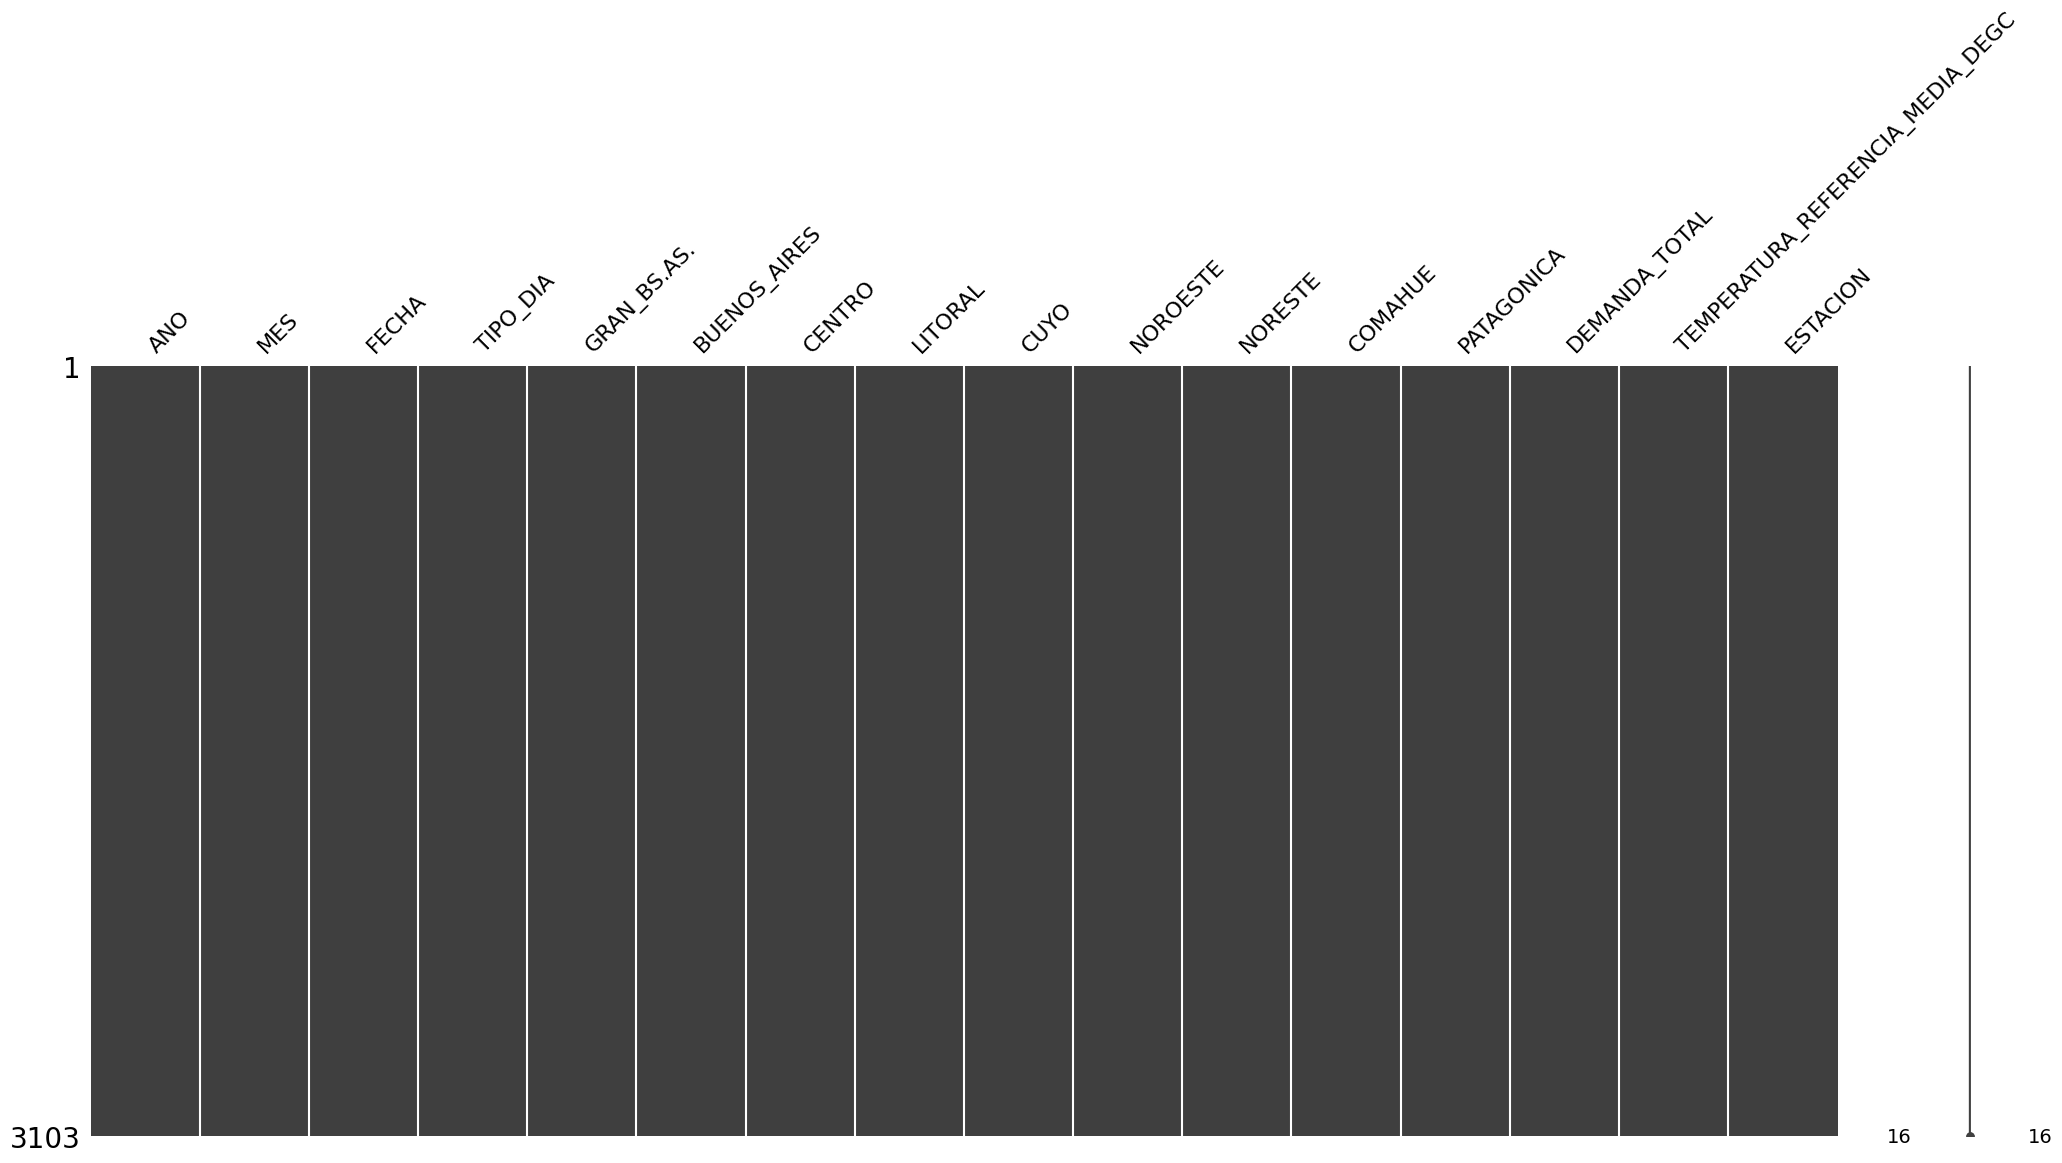

In [21]:
# Grafico de matriz de valores faltantes
msno.matrix(df)

<Axes: >

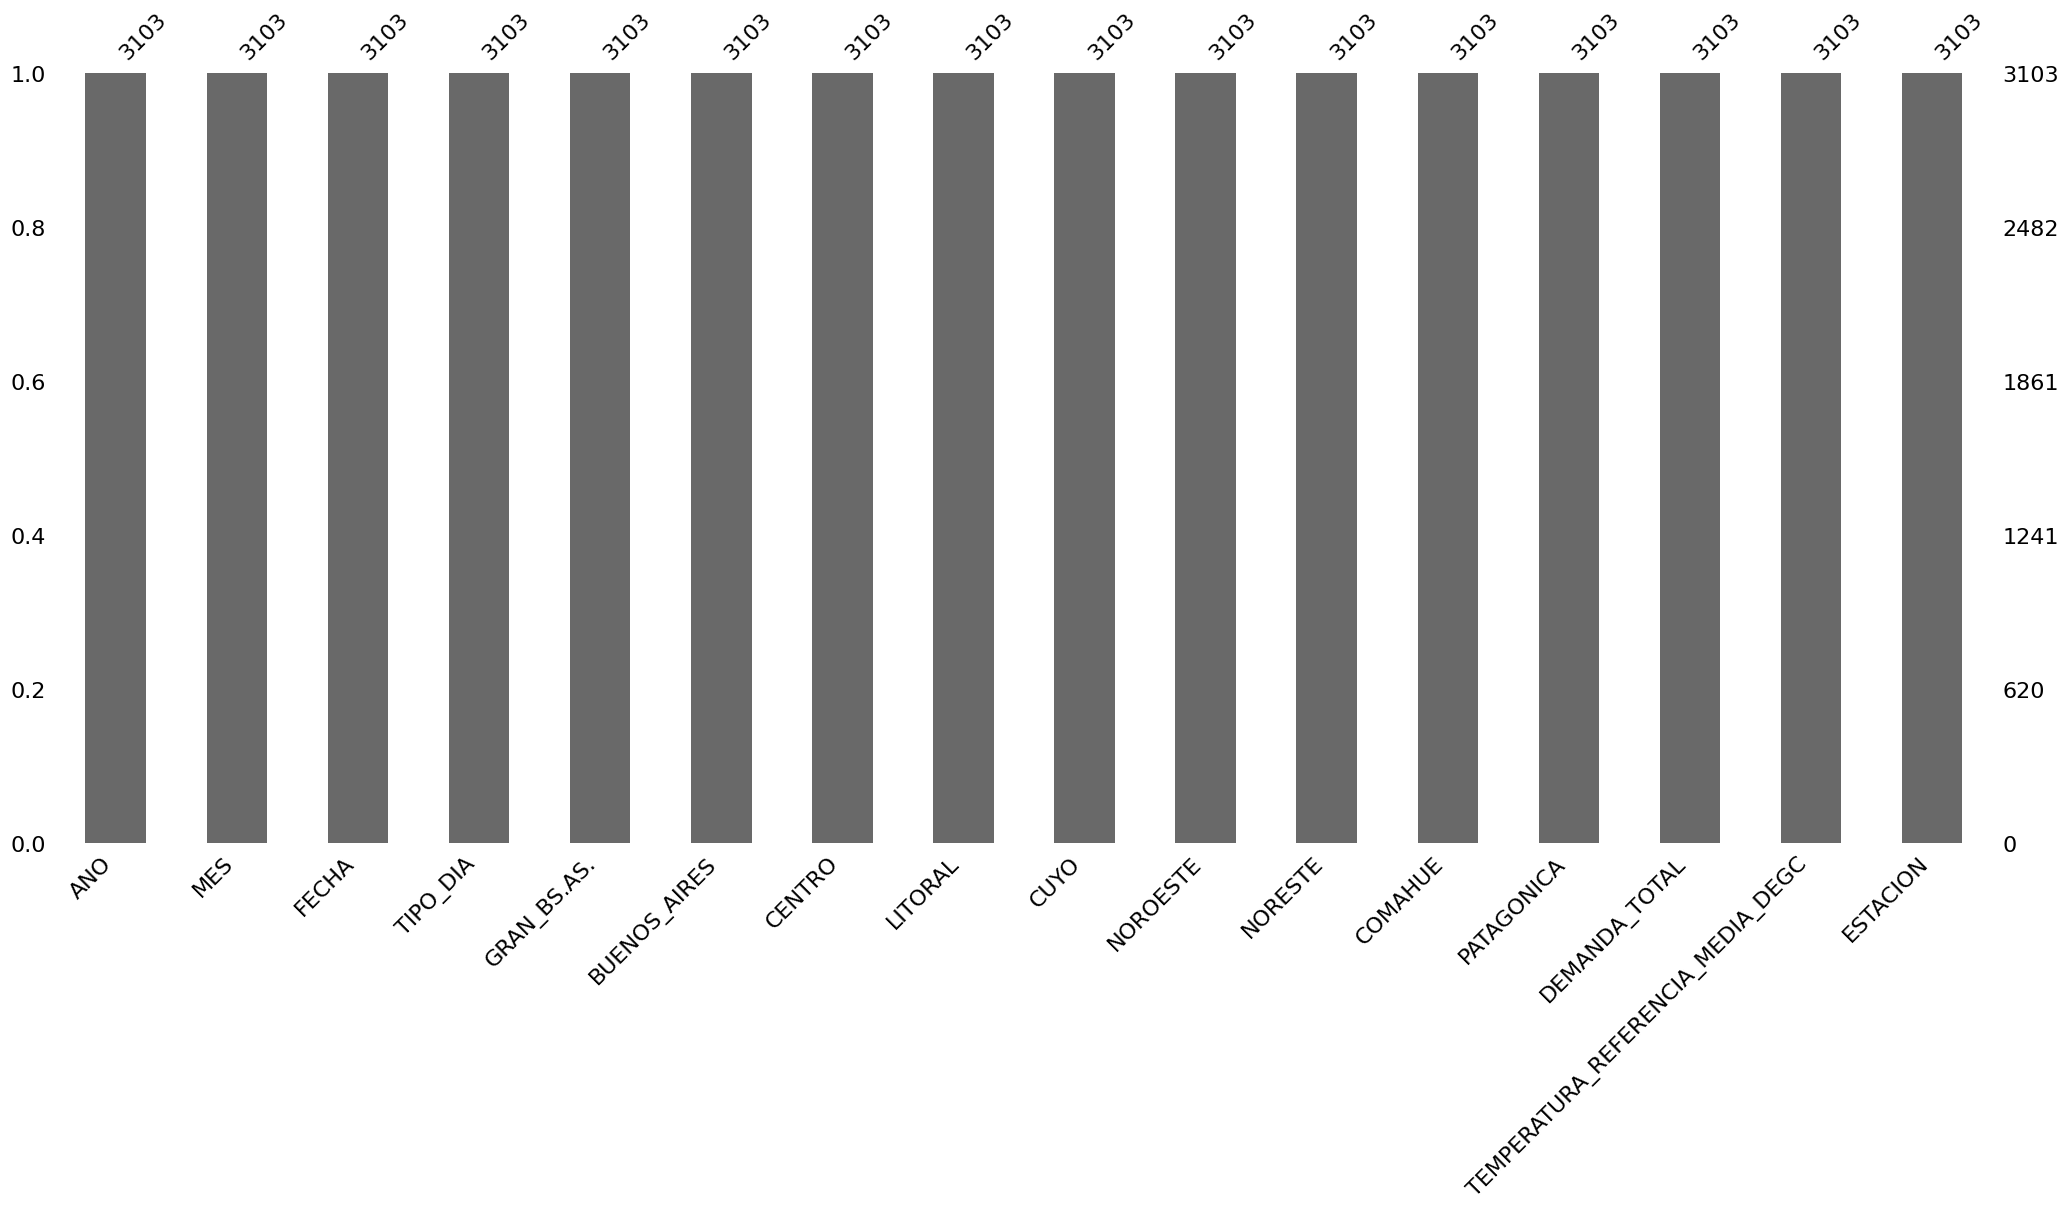

In [22]:
# Gráfico de barras de valores faltantes por columna
msno.bar(df)

## Análisis de duplicados

In [85]:
# Filas duplicadas
duplicados_completos = df[df.duplicated()]
print(f"Filas completamente duplicadas: {len(duplicados_completos)}")

Filas completamente duplicadas: 0


In [86]:
# Fechas duplicadas (independientemente de otras columnas)
duplicadas_fecha = df[df.duplicated(subset='FECHA')]
print(f"Fechas duplicadas: {len(duplicadas_fecha)}")

Fechas duplicadas: 0


## Análisis de valores outliers

Se encontraron 44 outliers en la demanda total.


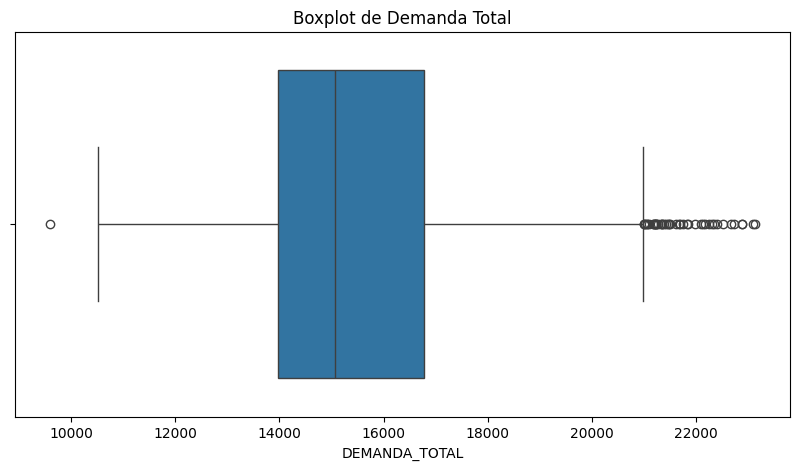

In [87]:
Q1 = df['DEMANDA_TOTAL'].quantile(0.25)
Q3 = df['DEMANDA_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['DEMANDA_TOTAL'] < limite_inferior) | (df['DEMANDA_TOTAL'] > limite_superior)]

print(f"Se encontraron {outliers.shape[0]} outliers en la demanda total.")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['DEMANDA_TOTAL'])
plt.title('Boxplot de Demanda Total')
plt.show()

,REGION,CANTIDAD_OUTLIERS
8,PATAGONICA,300
4,CUYO,115
3,LITORAL,98
7,COMAHUE,86
6,NOROESTE,66
2,CENTRO,60
1,BUENOS_AIRES,38
5,NORESTE,25
0,GRAN_BS.AS.,19


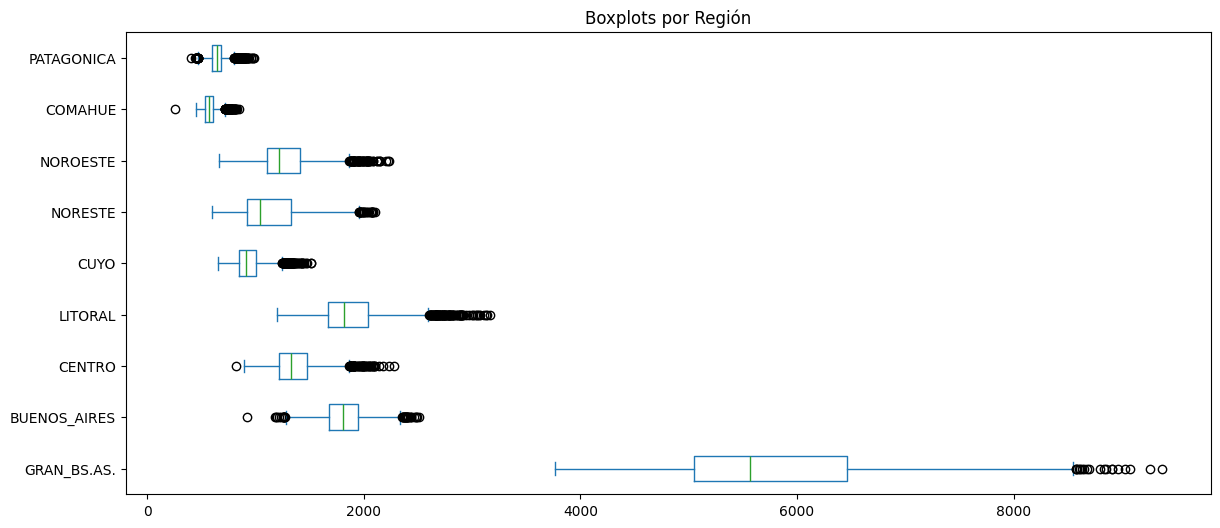

In [88]:
outliers_por_region = {}

for region in columnas_regiones:
    Q1 = df[region].quantile(0.25)
    Q3 = df[region].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[region] < limite_inferior) | (df[region] > limite_superior)]

    outliers_por_region[region] = outliers.shape[0]

df_outliers = pd.DataFrame(list(outliers_por_region.items()), columns=['REGION', 'CANTIDAD_OUTLIERS'])
df_outliers = df_outliers.sort_values(by='CANTIDAD_OUTLIERS', ascending=False)
display(df_outliers)

df[columnas_regiones].plot(kind='box', figsize=(14, 6), vert=False)
plt.title('Boxplots por Región')
plt.show()

# **Análisis Exploratorio de datos**

## Análisis de la variable objetivo

,DEMANDA_TOTAL
count,3103.000000
mean,15404.075260
std,2127.728954
min,9594.112833
25%,13964.566521
50%,15061.095542
75%,16777.041479
max,23128.424583


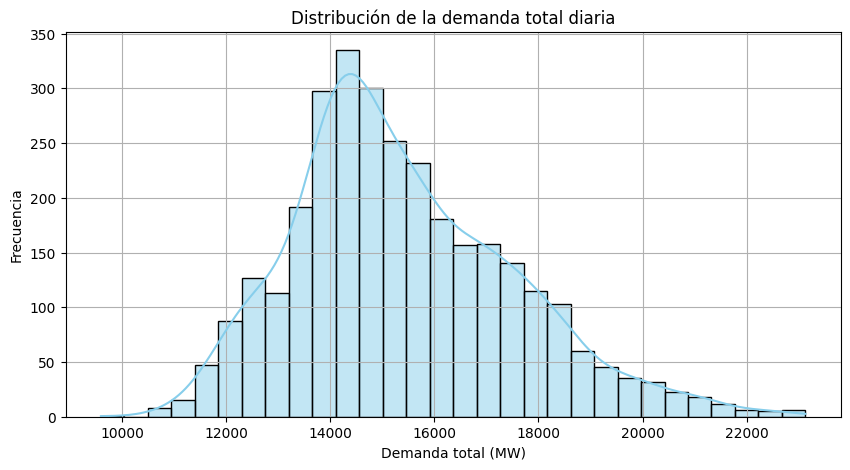

In [89]:
display(df['DEMANDA_TOTAL'].describe())

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['DEMANDA_TOTAL'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la demanda total diaria')
plt.xlabel('Demanda total (MW)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Forma de la distribución:**

Es asimétrica positiva (sesgada a la derecha).

La mayoría de los valores se concentran entre los 13.000 y 16.000 MW.

Hay una “cola” hacia valores mayores, lo que indica presencia de días con altas demandas excepcionales.

**Moda:**

El pico de frecuencia está cerca de los 14.500 MW, lo que sería la moda: el valor más frecuente de demanda diaria.

**Valores extremos (outliers):**

Hay valores que superan los 20.000 MW, lo que puede asociarse a días de alto consumo energético, probablemente en verano (uso de aire acondicionado) o invierno (calefacción).

**Interpretación:**

El sistema eléctrico nacional opera la mayor parte del tiempo en un rango bastante estable.

La asimetría sugiere que los picos de demanda (eventos extremos) son menos frecuentes pero relevantes.

## Primera pregunta  ¿Qué meses tienen mayor demanda eléctrica total?

In [95]:
# Asegurarse de que 'FECHA' es datetime y hay columna MES
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['MES'] = df['FECHA'].dt.month

# Agrupar por MES y sumar la demanda total
demanda_por_mes = df.groupby('MES')['DEMANDA_TOTAL'].sum().reset_index()

# Para ordenarlo por mes calendario con nombres
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
demanda_por_mes['NOMBRE_MES'] = demanda_por_mes['MES'].apply(lambda x: meses[x-1])

,MES,DEMANDA_TOTAL,NOMBRE_MES
0,1,4.744451e+06,Enero
1,2,4.264754e+06,Febrero
2,3,4.299090e+06,Marzo
3,4,3.676510e+06,Abril
4,5,4.089509e+06,Mayo
5,6,4.409520e+06,Junio
6,7,4.139756e+06,Julio
7,8,3.849697e+06,Agosto
8,9,3.428846e+06,Septiembre
9,10,3.430490e+06,Octubre


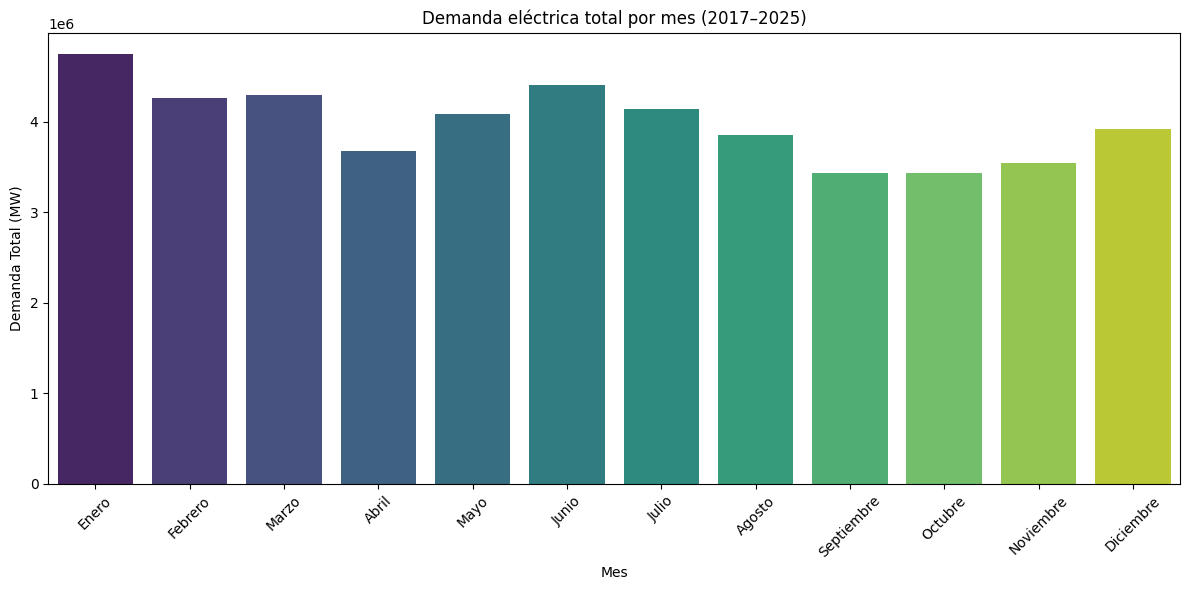

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(data=demanda_por_mes, x='NOMBRE_MES', y='DEMANDA_TOTAL', hue='NOMBRE_MES', palette='viridis', legend=False)
plt.title('Demanda eléctrica total por mes (2017–2025)')
plt.xlabel('Mes')
plt.ylabel('Demanda Total (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
display(demanda_por_mes)
plt.show()

Con este gráfico de barra podemos contestar la primer pregunta: ¿Qué meses tienen mayor demanda eléctrica total?

Las barras de Enero, Febrero, Marzo, Junio y Diciembre, los cuales tiene mayor amplitud térmica, representan los meses con mayor consumo de energia.

## Segunda pregunta ¿Existe una correlación entre la temperatura y la demanda eléctrica en cada región?

In [97]:
correlaciones = {}

for region in columnas_regiones:
    correlaciones[region] = df['TEMPERATURA_REFERENCIA_MEDIA_DEGC'].corr(df[region])

# Convertir a DataFrame para visualizar mejor
correlacion_df = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Correlación']).sort_values(by='Correlación', ascending=False)
display(correlacion_df)

,Correlación
NORESTE,0.707632
NOROESTE,0.522596
CUYO,0.442594
LITORAL,0.349086
COMAHUE,0.194319
CENTRO,0.128014
BUENOS_AIRES,0.001494
GRAN_BS.AS.,-0.153224
PATAGONICA,-0.301472


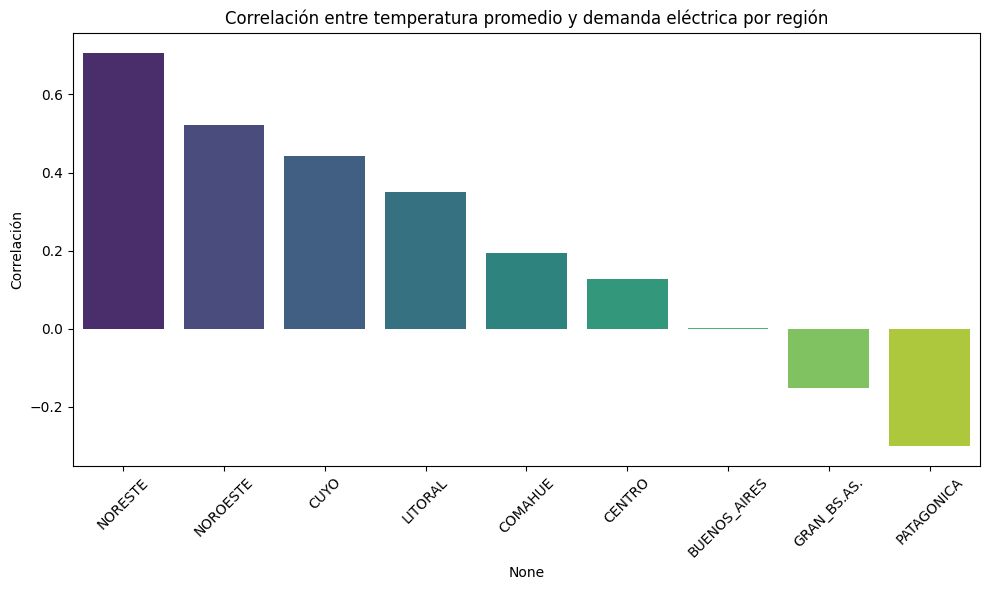

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlacion_df.index, y='Correlación', hue=correlacion_df.index, data=correlacion_df, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Correlación entre temperatura promedio y demanda eléctrica por región')
plt.tight_layout()
plt.show()

Con este gráfico podemos contestar la segunda pregunta: ¿Existe una correlación entre la temperatura y la demanda eléctrica en cada región?

Se puede visualizar que las regiones con una fuerte correlación positiva son el Noreste, Noroeste y en menor medida Cuyo y Litoral.

En el caso de correlación negativa podemos ver la Patagonia y en menor medida Gran BsAs.

## Tercera pregunta ¿Qué regiones muestran mayor variabilidad de demanda entre días laborables y fines de semana?

In [34]:
# Defino tipo de dia simple
df['TIPO_DIA_SIMPLE'] = df['TIPO_DIA'].apply(lambda x: 'Finde' if x in ['Sabado o Semilaborable', 'Domingo o Feriado'] else 'Laborable')

# Dividir el dataframe según tipo de día
df_laborable = df[df['TIPO_DIA_SIMPLE'] == 'Laborable']
df_finde = df[df['TIPO_DIA_SIMPLE'] == 'Finde']

# Calcular la desviación estándar de cada grupo
std_laborable = df_laborable[columnas_regiones].std()
std_finde = df_finde[columnas_regiones].std()

variabilidad = pd.DataFrame({
    'Desv_Laborable': std_laborable,
    'Desv_Finde': std_finde
})
variabilidad['DIFERENCIA'] = abs(variabilidad['Desv_Laborable'] - variabilidad['Desv_Finde'])

# Ordenar por mayor diferencia
variabilidad_ordenada = variabilidad.sort_values(by='DIFERENCIA', ascending=False)

,Desv_Laborable,Desv_Finde,DIFERENCIA
GRAN_BS.AS.,971.281690,907.732131,63.549559
BUENOS_AIRES,183.525620,196.120756,12.595135
LITORAL,287.766447,275.597053,12.169394
CENTRO,186.244773,177.446810,8.797963
CUYO,133.047878,124.428999,8.618879
NOROESTE,234.541148,226.986460,7.554688
PATAGONICA,88.096643,82.214831,5.881812
NORESTE,283.726178,281.069045,2.657133
COMAHUE,54.456238,52.366931,2.089308


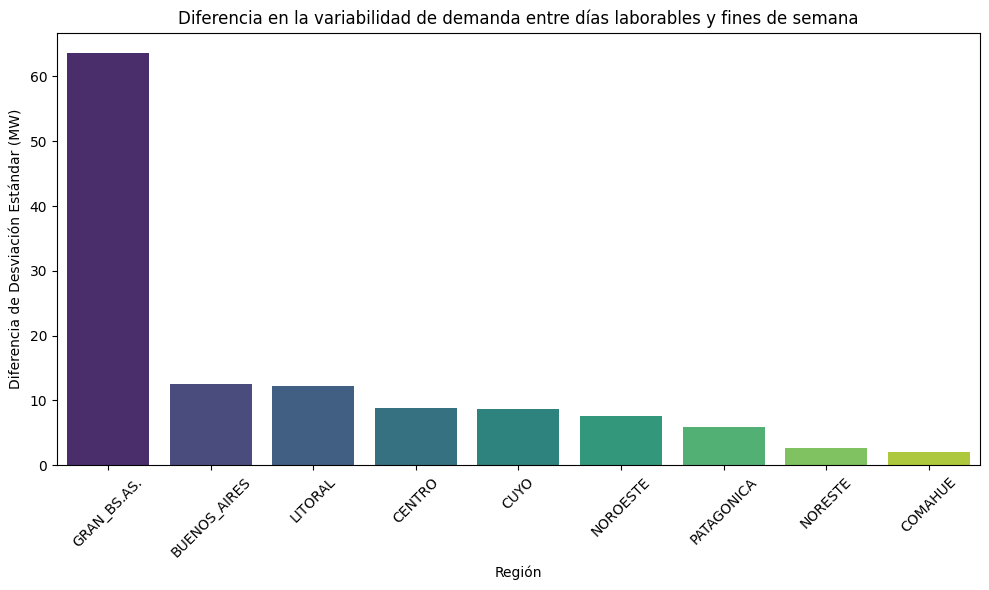

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=variabilidad_ordenada.index, y='DIFERENCIA', hue=variabilidad_ordenada.index, data=variabilidad_ordenada, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Diferencia en la variabilidad de demanda entre días laborables y fines de semana')
plt.ylabel('Diferencia de Desviación Estándar (MW)')
plt.xlabel('Región')
plt.tight_layout()
display(variabilidad_ordenada)
plt.show()

Con este gráfico podemos contestar la tercera pregunta: ¿Qué regiones muestran mayor variabilidad de demanda entre días laborables y fines de semana?

Se puede visualizar que las regiones que tiene mayor variabilidad de demanda entre los dias laborales y no laborales son Gran. BsAs, y muy por debajo sigue Buenos Aires, Litoral, Centro, Cuyo y Nosoeste.

La zona Comahue y Noreste tiene poca variabilidad.


## Cuarta pregunta ¿Cómo varía la demanda total estacionalmente?

In [36]:
demanda_por_estacion = df.groupby('ESTACION')['DEMANDA_TOTAL'].mean().reindex(['Verano', 'Otoño', 'Invierno', 'Primavera'])

,DEMANDA_TOTAL
ESTACION,
Verano,16558.559193
Otoño,14571.386913
Invierno,16186.649401
Primavera,14289.188183


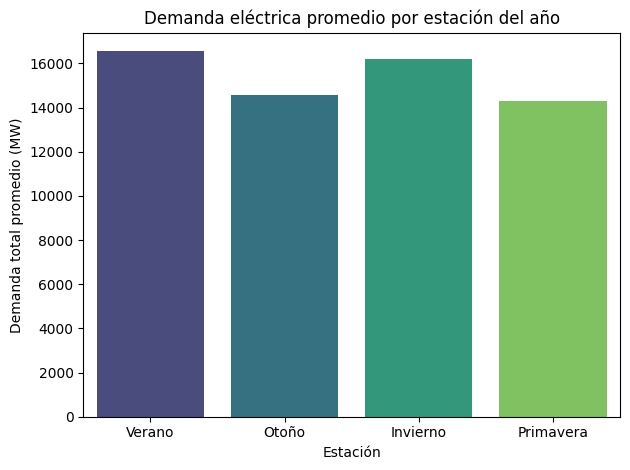

In [63]:
# Convertir la Serie a DataFrame
df_estacion = demanda_por_estacion.reset_index()
df_estacion.columns = ['ESTACION', 'DEMANDA_PROMEDIO']

# Gráfico corregido
sns.barplot(x='ESTACION',y='DEMANDA_PROMEDIO', hue='ESTACION', data=df_estacion, palette='viridis', legend=False)
plt.title('Demanda eléctrica promedio por estación del año')
plt.ylabel('Demanda total promedio (MW)')
plt.xlabel('Estación')
plt.tight_layout()
display(demanda_por_estacion)

plt.show()

Con este gráfico podemos contestar la cuarta pregunta: ¿Cómo varía la demanda total estacionalmente?

Se puede visualizar que las demandas más altas son en Verano e Invierno casi en la misma magnitud. Las estaciones de otoño y primavera registran los niveles más bajos de demanda, también con magnitudes comparables.

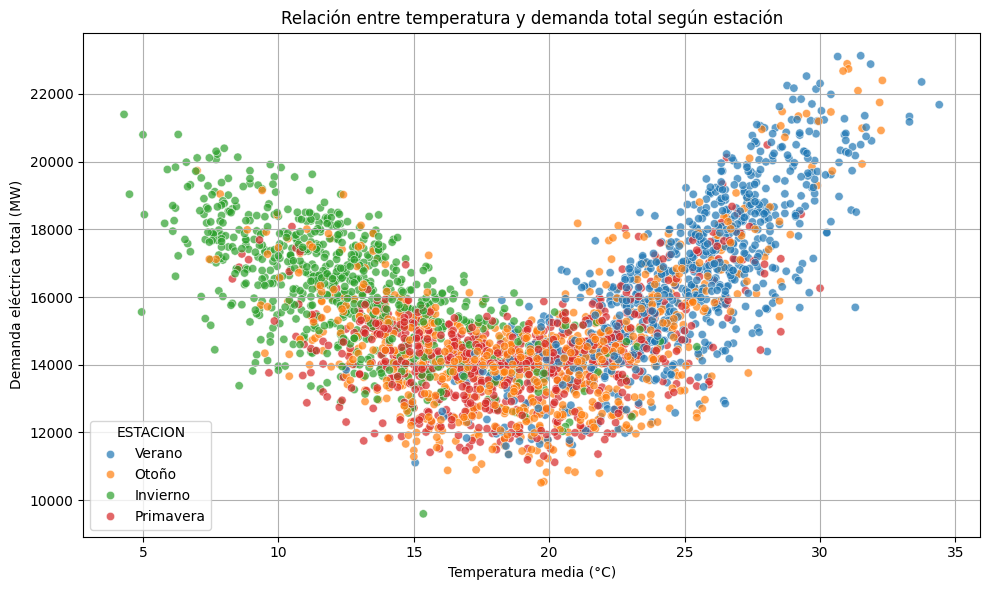

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='TEMPERATURA_REFERENCIA_MEDIA_DEGC',      # Temperatura media
    y='DEMANDA_TOTAL',                          # Demanda total
    hue='ESTACION',                             # Estación del año
    alpha=0.7
)
plt.title('Relación entre temperatura y demanda total según estación')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Demanda eléctrica total (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

Con este gráfico de dispersión multivariado, reforzamos la respuesta anterior.

La relación entre temperatura y demanda varía según la estación del año. En verano, por ejemplo, la demanda crece con la temperatura (posiblemente por el uso de aires acondicionados), mientras que en invierno también se observan altos niveles de demanda a bajas temperaturas.

Otoño y primavera, por el contrario, presentan temperaturas moderadas y menor demanda, lo que confirma una relación estacional no lineal.

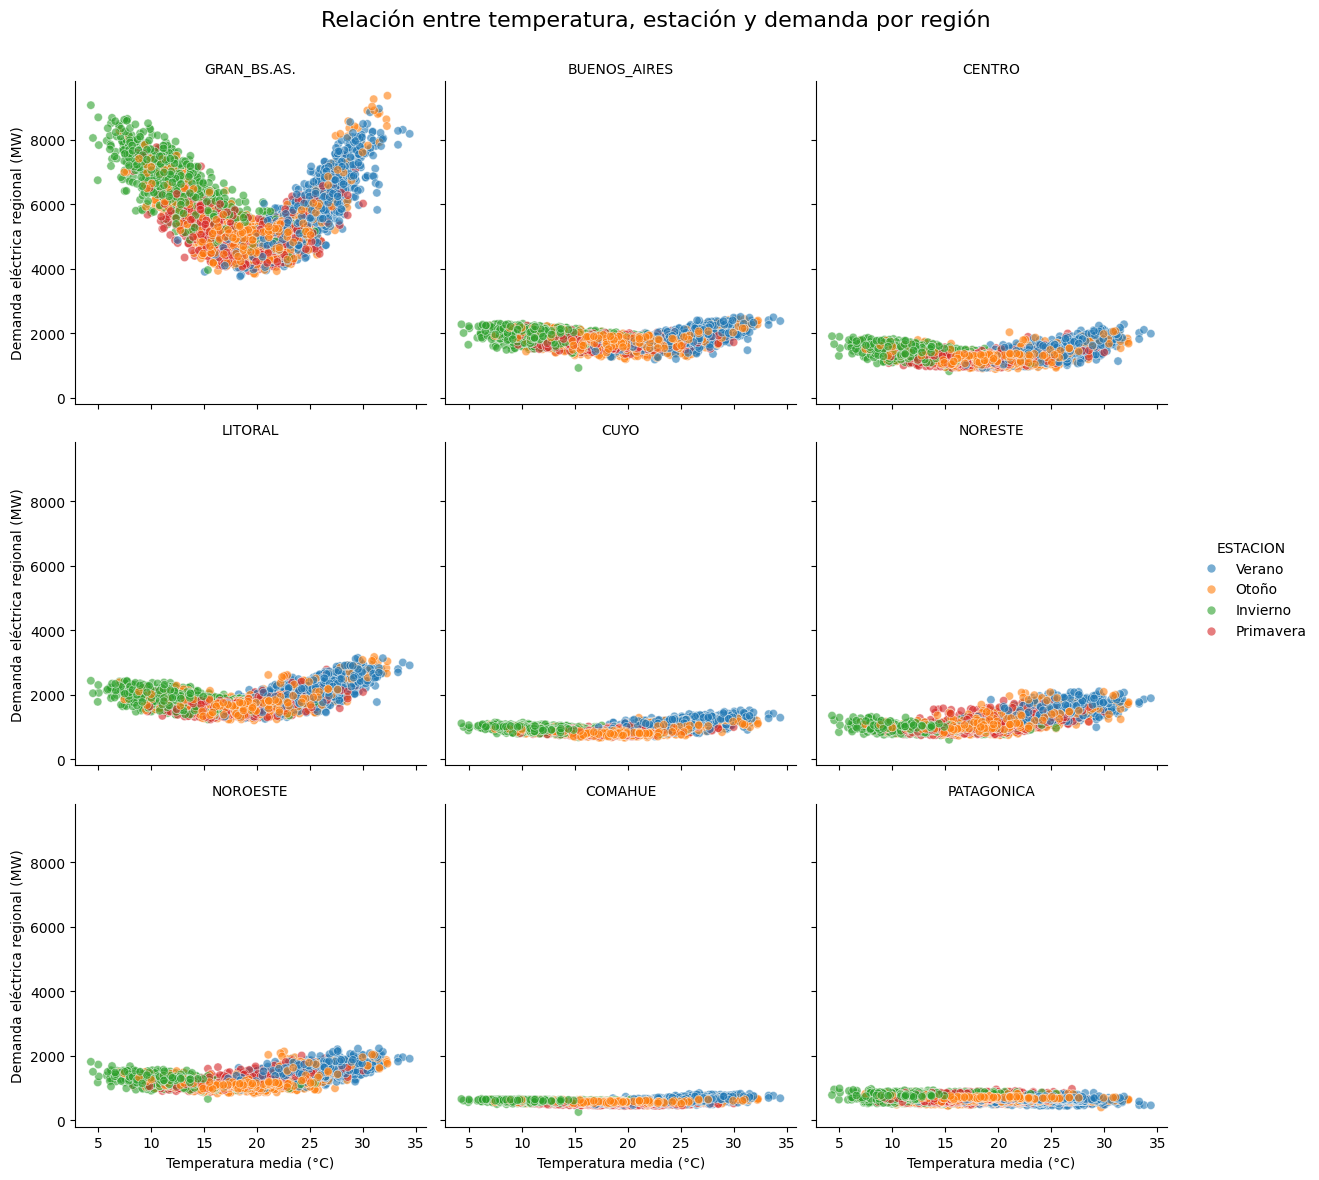

In [49]:
# Reestructurar el dataframe a formato largo por regiones

df_long = df.melt(id_vars=['FECHA', 'TEMPERATURA_REFERENCIA_MEDIA_DEGC', 'ESTACION'], value_vars=columnas_regiones,var_name='REGION',value_name='DEMANDA_REGIONAL')

# Crear gráfico
g = sns.relplot(
    data=df_long,
    x='TEMPERATURA_REFERENCIA_MEDIA_DEGC',
    y='DEMANDA_REGIONAL',
    col='REGION',
    hue='ESTACION',
    kind='scatter',
    col_wrap=3,
    height=4,
    aspect=1,
    alpha=0.6
)

g.set_axis_labels('Temperatura media (°C)', 'Demanda eléctrica regional (MW)')
g.set_titles('{col_name}')
g.fig.suptitle('Relación entre temperatura, estación y demanda por región', fontsize=16)
g.tight_layout()
g.fig.subplots_adjust(top=0.92)
plt.show()

Este gráfico permite observar cómo varía la demanda eléctrica regional en función de la temperatura y cómo este vínculo se modula por la estación del año.

Se pueden observar patrones como:

Alta demanda en verano a altas temperaturas en regiones como Gran buenos Aires.

Regiones como CUYO o COMAHUE podrían mostrar menor sensibilidad térmica.

## Quinta pregunta: ¿Hay alguna tendencia creciente o decreciente de la demanda a lo largo de los años?

,DEMANDA_TOTAL
ANO,
2017,15129.020506
2018,15183.781328
2019,14719.869637
2020,14493.048480
2021,15282.818095
2022,15841.921492
2023,16082.595701
2024,15963.046537
2025,16487.913198


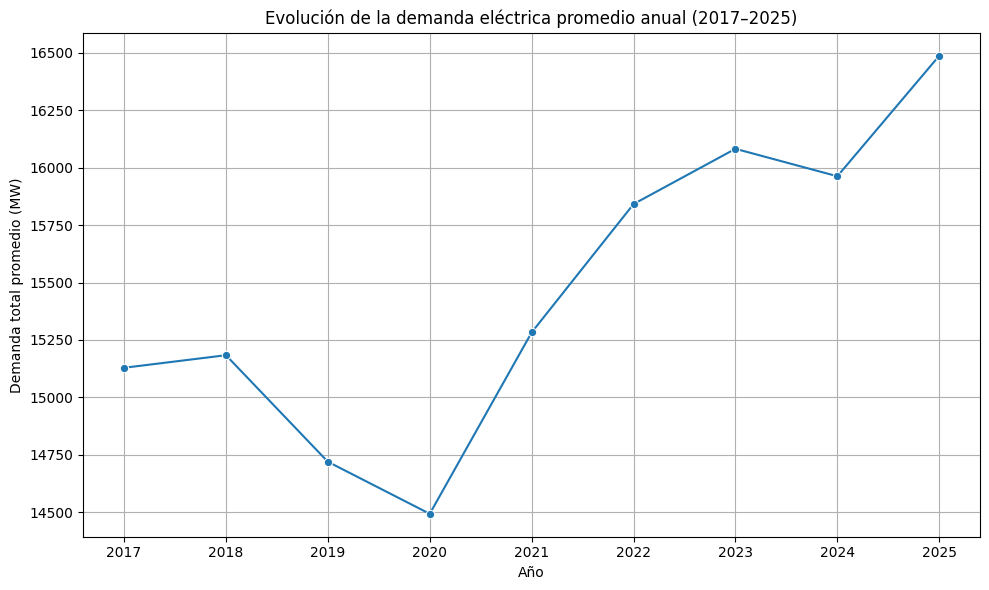

In [64]:
demanda_anual = df.groupby('ANO')['DEMANDA_TOTAL'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=demanda_anual.index, y=demanda_anual.values, marker='o')
plt.title('Evolución de la demanda eléctrica promedio anual (2017–2025)')
plt.xlabel('Año')
plt.ylabel('Demanda total promedio (MW)')
plt.grid(True)
plt.tight_layout()
display(demanda_anual)
plt.show()

Con este gráfico podemos contestar la quinta pregunta: ¿Hay alguna tendencia creciente o decreciente de la demanda a lo largo de los años?

Se aprecia que la tendencia fue decreciente desde 2018 hasta 2020, coincidente con el arranque de la pandemia, y despues de esto se evidencia una tendencia creciente.

## Primera hipótesis: "Las regiones con climas más extremos, como Patagonia y Comahue, presentan una mayor variabilidad diaria en la demanda eléctrica que otras regiones."

GRAN_BS.AS.     1023.156379
LITORAL          318.976045
NORESTE          284.823429
NOROESTE         237.262556
CENTRO           212.801588
BUENOS_AIRES     210.590563
CUYO             137.483156
PATAGONICA        86.849689
COMAHUE           57.996356
dtype: float64


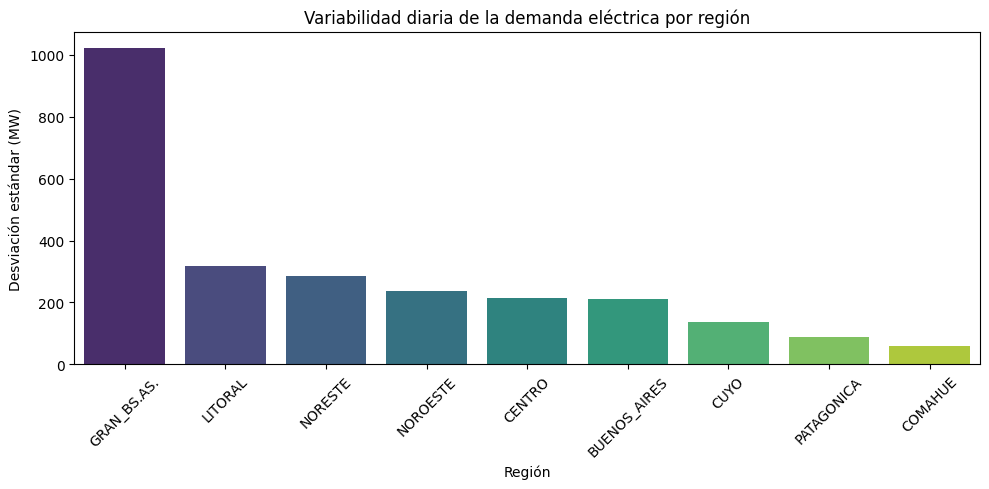

In [68]:
variabilidad_diaria = df[['GRAN_BS.AS.', 'BUENOS_AIRES', 'CENTRO', 'LITORAL','CUYO', 'NORESTE', 'NOROESTE', 'COMAHUE', 'PATAGONICA']].std()

variabilidad_diaria = variabilidad_diaria.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=variabilidad_diaria.index,
    y=variabilidad_diaria.values,
    hue=variabilidad_diaria.index,
    palette='viridis',
    legend=False
)
plt.title('Variabilidad diaria de la demanda eléctrica por región')
plt.ylabel('Desviación estándar (MW)')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.tight_layout()
print(variabilidad_diaria)
plt.show()

Con este gráfico podemos contestar la siguente hipótesis: "Las regiones con climas más extremos, como Patagonia y Comahue, presentan una mayor variabilidad diaria en la demanda eléctrica que otras regiones."

Podemos observar que las regiones própuestas en la hipotesis no presentan gran variabilidad de demanda eléctrica.

## Segunda hipótesis: La demanda en la región Cuyo en dias laborales es un 35% mayor en verano que en primavera.

Demanda promedio en CUYO (Laborable, Verano): 1115.86 MW
Demanda promedio en CUYO (Laborable, Primavera): 912.86 MW
Variación porcentual: 22.24%


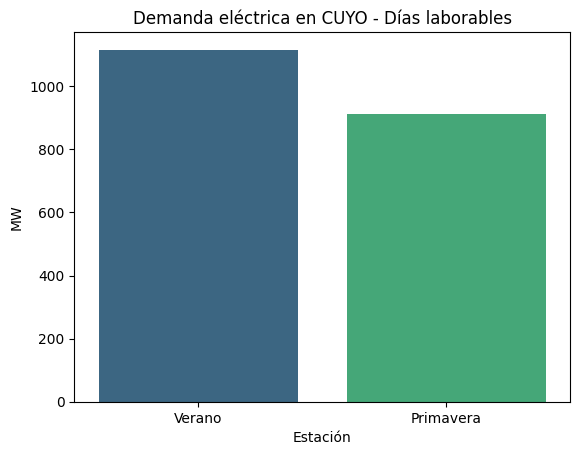

In [52]:
df_laborables = df[df['TIPO_DIA_SIMPLE'] == 'Laborable']
verano = df_laborables[df_laborables['ESTACION'] == 'Verano']
primavera = df_laborables[df_laborables['ESTACION'] == 'Primavera']
media_verano = verano['CUYO'].mean()
media_primavera = primavera['CUYO'].mean()
variacion_porcentual = ((media_verano - media_primavera) / media_primavera) * 100

print(f"Demanda promedio en CUYO (Laborable, Verano): {media_verano:.2f} MW")
print(f"Demanda promedio en CUYO (Laborable, Primavera): {media_primavera:.2f} MW")
print(f"Variación porcentual: {variacion_porcentual:.2f}%")

datos = {
    'Estación': ['Verano', 'Primavera'],
    'Demanda promedio (MW)': [media_verano, media_primavera]
}

df_comparacion = pd.DataFrame(datos)
sns.barplot(x='Estación', y='Demanda promedio (MW)', hue='Estación', data=df_comparacion, palette='viridis', legend=False)
plt.title('Demanda eléctrica en CUYO - Días laborables')
plt.ylabel('MW')
plt.show()

Con este gráfico podemos conestar la siguente hipotesis: La demanda en la región Cuyo en dias laborales es un 35% mayor en verano que en primavera.

La hipótesis planteada resulta incorrecta, ya que el análisis comparativo demuestra que, en la región de CUYO y considerando únicamente los días laborables, la demanda eléctrica durante el verano es apenas un 22% mayor que en primavera.

## Tercera hipótesis: Los fines de semana muestran menor demanda eléctrica que los días laborables en todas las regiones.

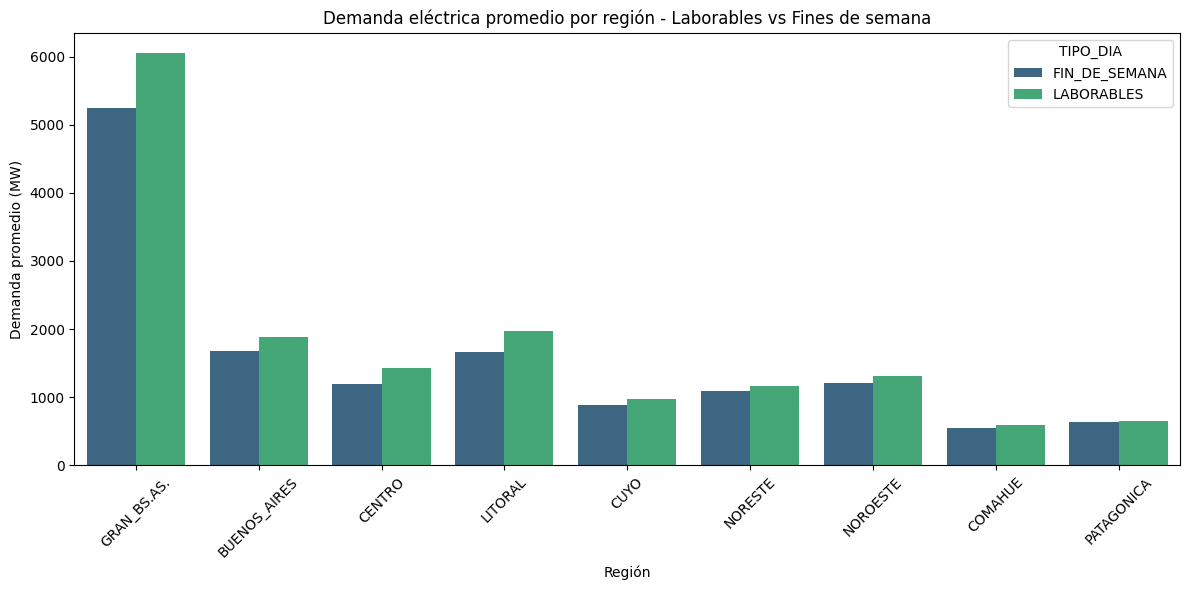

In [54]:
# Agrupamos por tipo de día y calculamos el promedio por región
df_dias = df.groupby('TIPO_DIA_SIMPLE')[columnas_regiones].mean().T.reset_index()
df_dias.columns = ['REGION', 'FIN_DE_SEMANA', 'LABORABLES']

# Reorganizamos para graficar con seaborn
df_melt = df_dias.melt(id_vars='REGION', var_name='TIPO_DIA', value_name='DEMANDA_PROMEDIO')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melt,
    x='REGION',
    y='DEMANDA_PROMEDIO',
    hue='TIPO_DIA',
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title('Demanda eléctrica promedio por región - Laborables vs Fines de semana')
plt.ylabel('Demanda promedio (MW)')
plt.xlabel('Región')
plt.tight_layout()
plt.show()

Con este gráfico podemos contestar la siguente hipótesis: Los fines de semana muestran menor demanda eléctrica que los días laborables en todas las regiones.

Esta hipótesis resulta afirmativa, ya que el análisis muestra que, en todas las regiones, la demanda eléctrica durante los fines de semana es consistentemente inferior a la registrada en los días laborables.